In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
map_data = pd.read_csv('data/SHR65_23.csv', index_col=0)
map_data.head()

,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
ID,,,,,,,,,,,,,,,,,,,,,
197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,NaN,0,0,30180.0,"Anchorage, AK"
197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"
197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,...,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,"Anchorage, AK"


In [16]:
map_data.shape

(894636, 29)

In [9]:
map_data.dtypes

CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

In [10]:
map_data.isna().sum()

CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       797085
VicCount             0
OffCount             0
FileDate         28012
MSA                  0
dtype: int64

In [3]:
map_data.drop(['Ori', 'FileDate', 'ActionType'], axis=1, inplace=True)

## EDA

In [7]:
colors = {
    'Sex': ['pink', 'b', 'w'],
    'Solved': ['r', 'b'],
    'Source': ['g', 'b'],
}

<AxesSubplot:xlabel='Solved'>

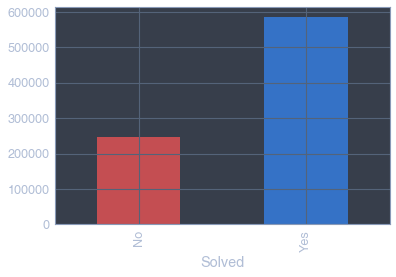

In [12]:
map_data.groupby('Solved').count()['CNTYFIPS'].plot(kind='bar', color=colors['Solved'])

Text(0.5, 1.0, 'Cases by Year')

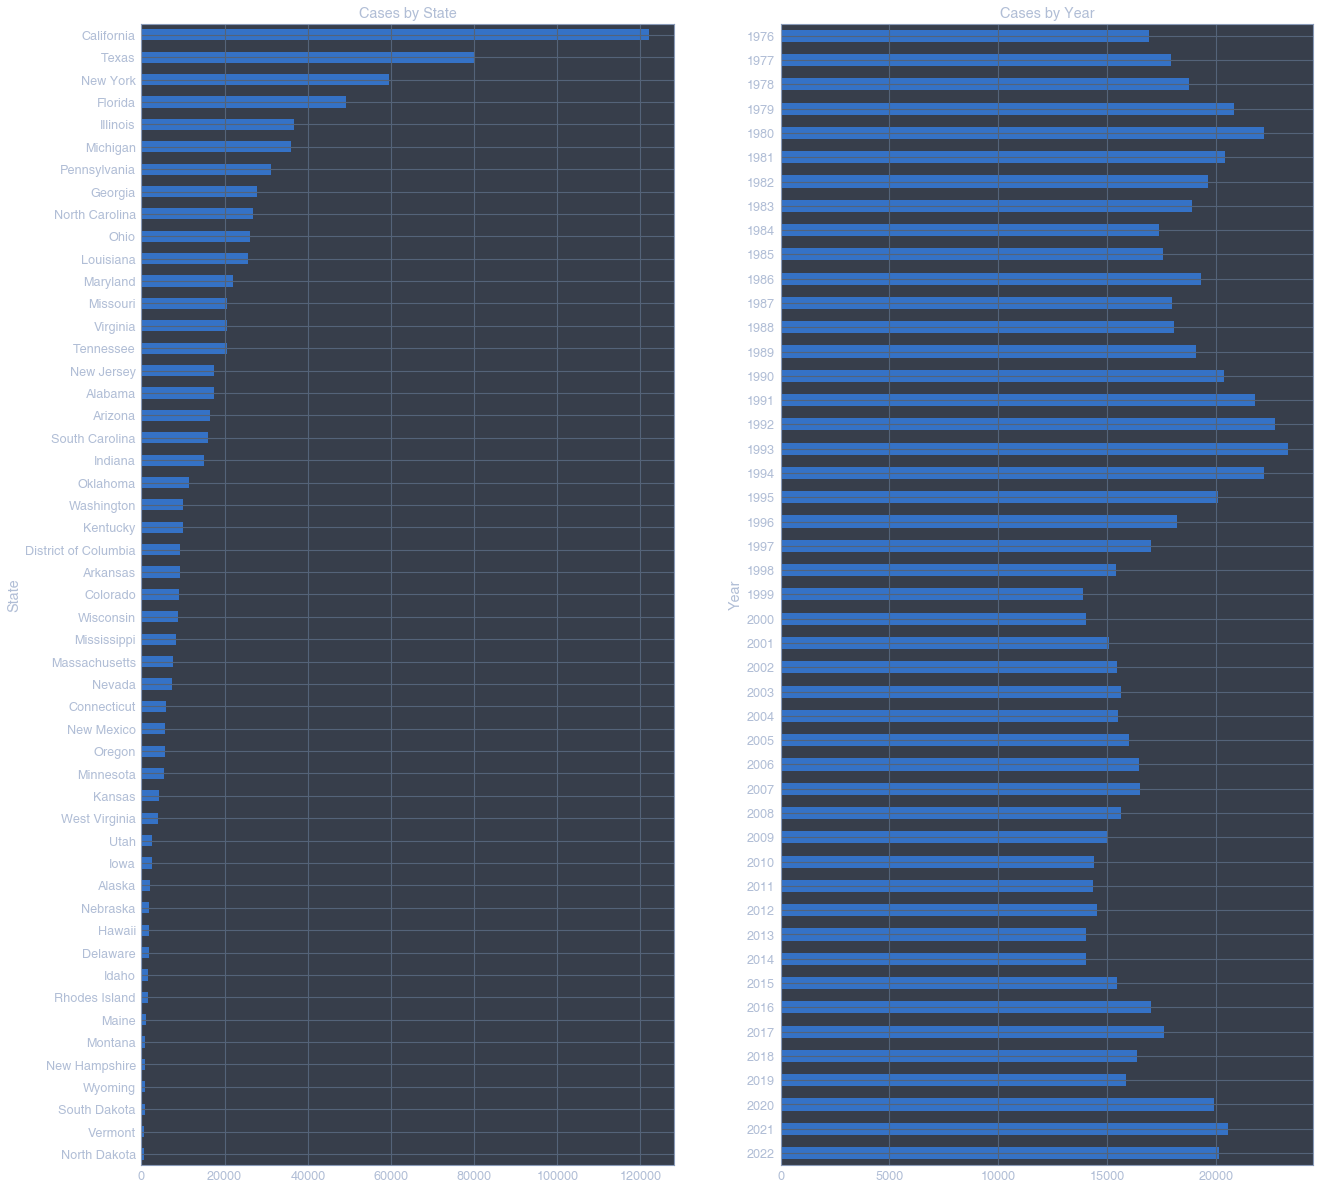

In [14]:
cases_by_state = map_data.groupby('State').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
cases_by_year = map_data.groupby('Year').count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

cases_by_state.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Cases by State')

cases_by_year.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Cases by Year')

Text(0.5, 1.0, 'Cases by Homicide')

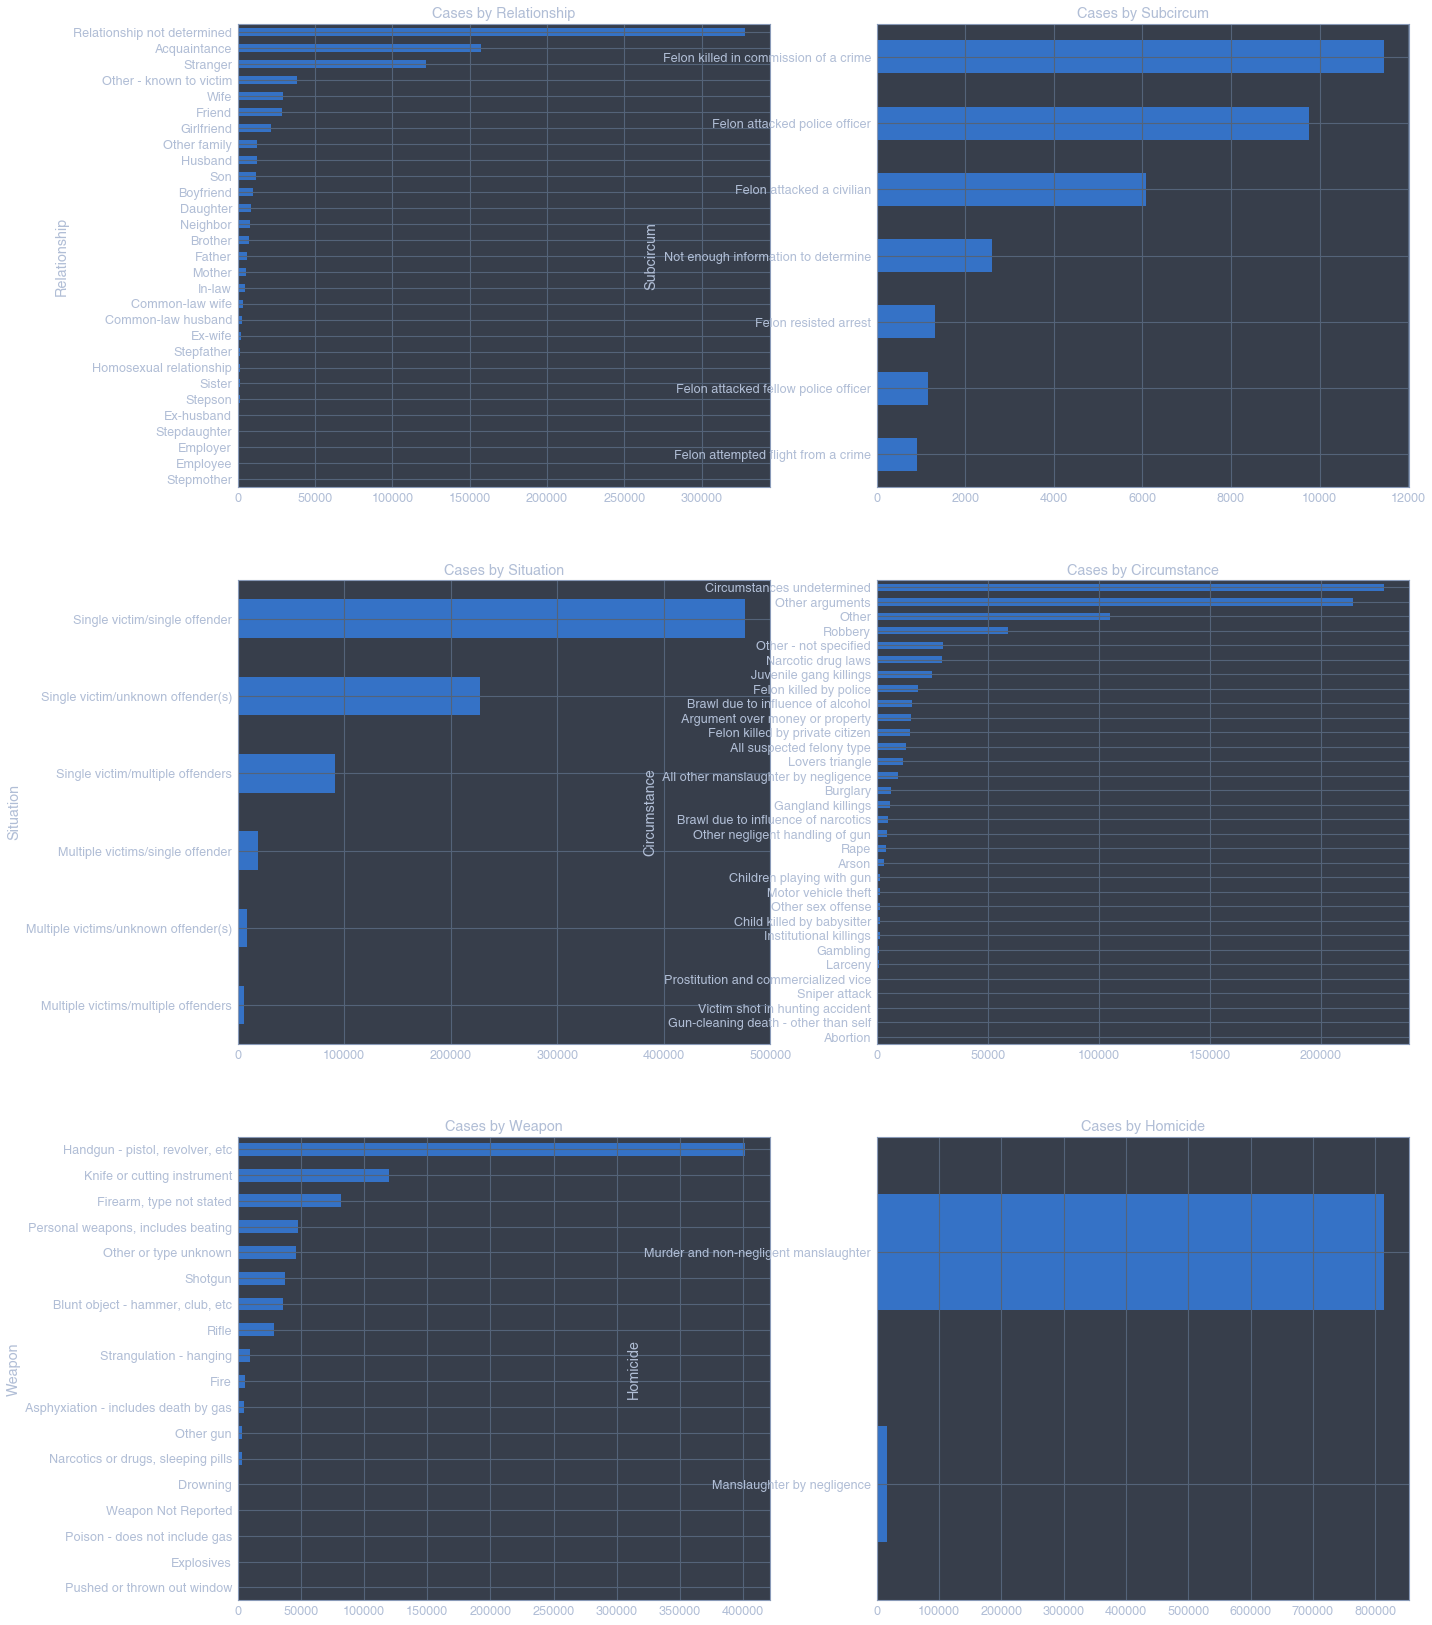

In [15]:
relationship = map_data.groupby('Relationship').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
subcircum = map_data.groupby('Subcircum').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
situation = map_data.groupby('Situation').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
homicide = map_data.groupby('Homicide').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
circumstance = map_data.groupby('Circumstance').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
weapon = map_data.groupby('Weapon').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

fig, ax = plt.subplots(3, 2, figsize=(21, 29))

relationship.plot(kind='barh', ax=ax[0, 0]).invert_yaxis()
ax[0, 0].set_title('Cases by Relationship')

subcircum.plot(kind='barh', ax=ax[0, 1]).invert_yaxis()
ax[0, 1].set_title('Cases by Subcircum')

situation.plot(kind='barh', ax=ax[1, 0]).invert_yaxis()
ax[1, 0].set_title('Cases by Situation')

circumstance.plot(kind='barh', ax=ax[1, 1]).invert_yaxis()
ax[1, 1].set_title('Cases by Circumstance')

weapon.plot(kind='barh', ax=ax[2, 0]).invert_yaxis()
ax[2, 0].set_title('Cases by Weapon')

homicide.plot(kind='barh', ax=ax[2, 1]).invert_yaxis()
ax[2, 1].set_title('Cases by Homicide')

Text(0.5, 1.0, 'Offenders Race')

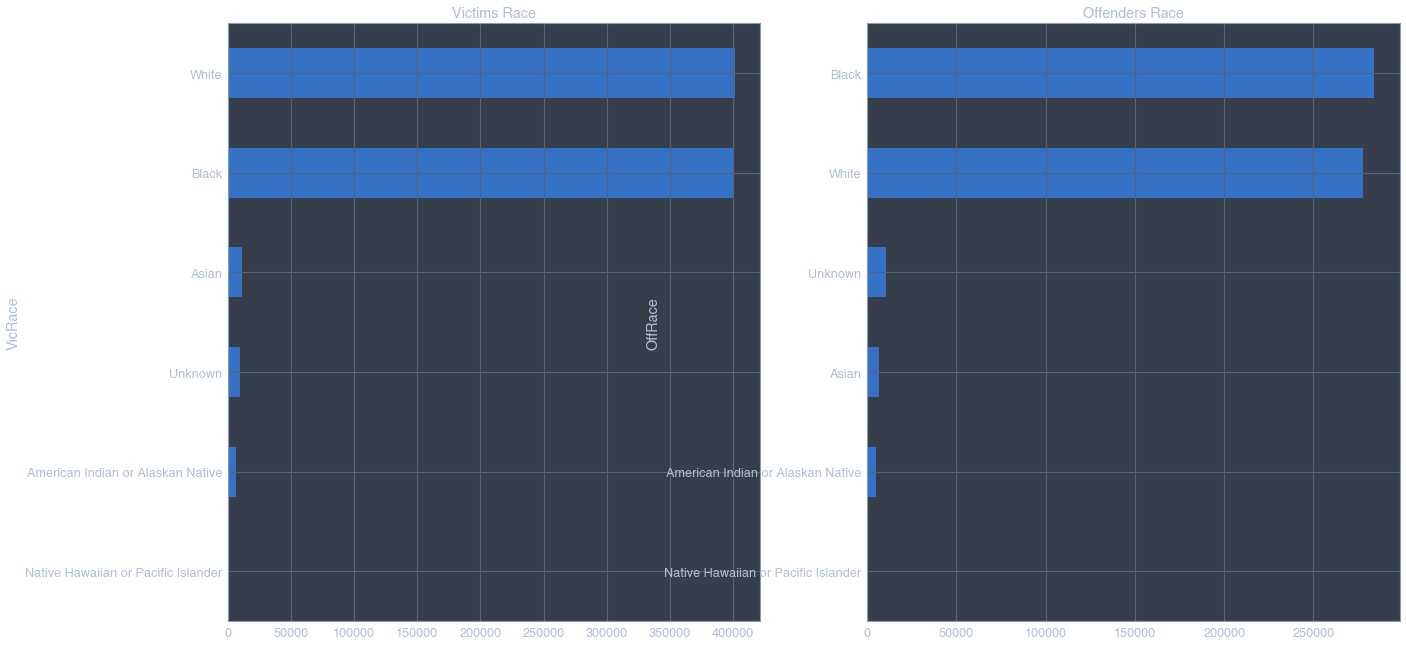

In [17]:
victim_race = map_data.groupby('VicRace').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']
offender_race = map_data[map_data['Solved']=='Yes'].groupby('OffRace').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 11))

victim_race.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Victims Race')

offender_race.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Offenders Race')

Text(0.5, 1.0, 'Offender Age')

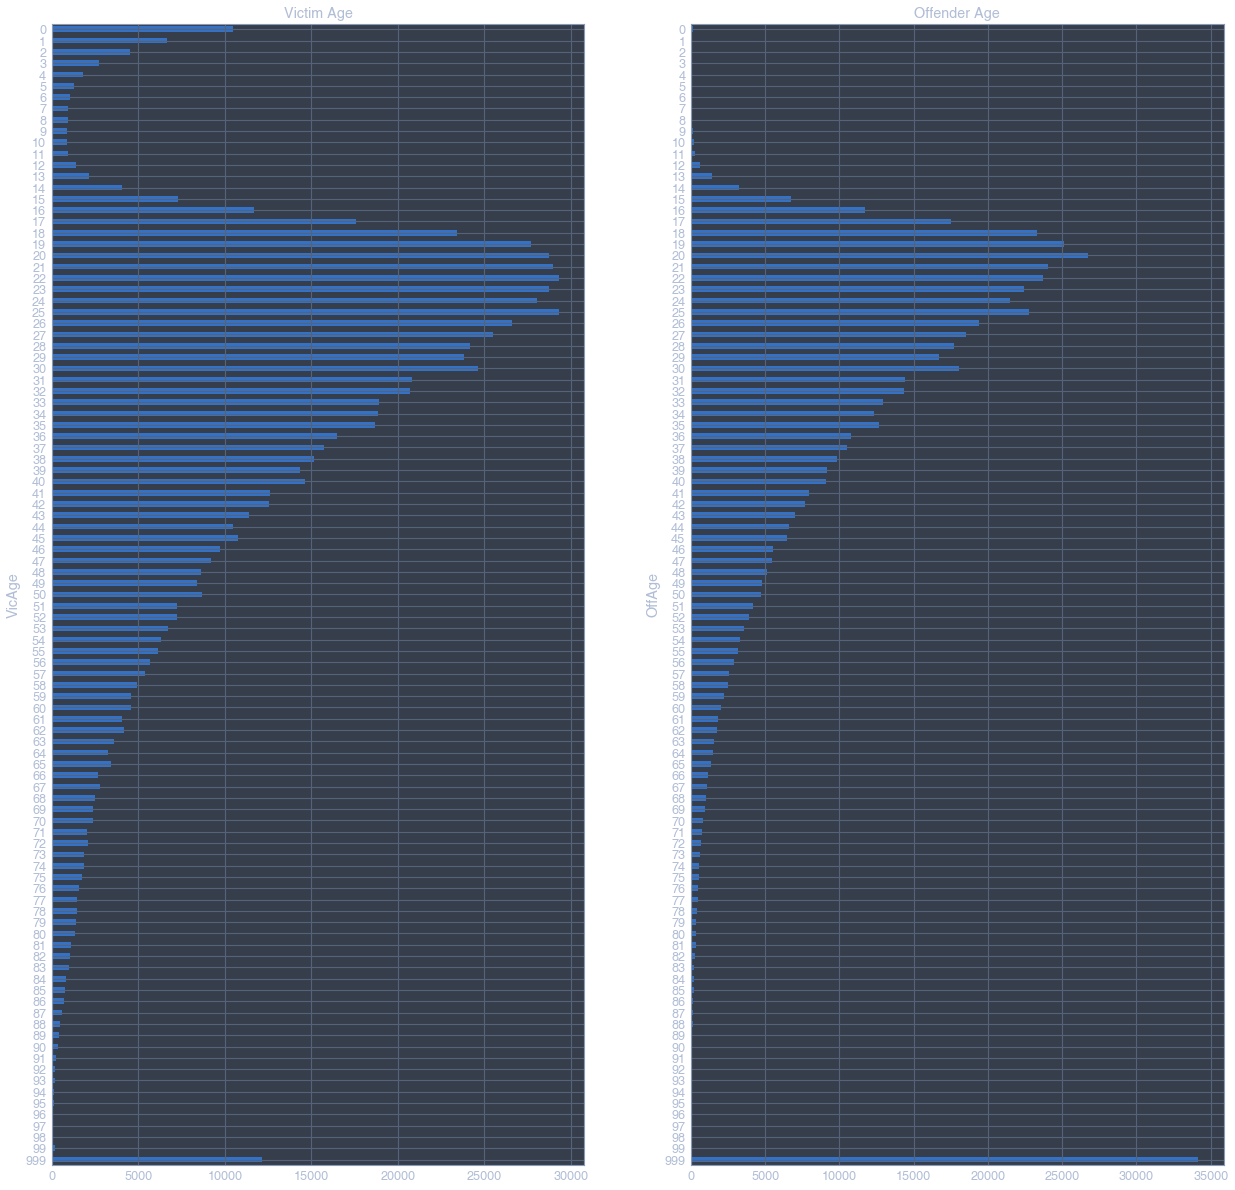

In [18]:
victim_age = map_data.groupby('VicAge').count()['CNTYFIPS']
offender_age = map_data[map_data['Solved']=='Yes'].groupby('OffAge').count()['CNTYFIPS']

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

victim_age.plot(kind='barh', ax=ax[0]).invert_yaxis()
ax[0].set_title('Victim Age')

offender_age.plot(kind='barh', ax=ax[1]).invert_yaxis()
ax[1].set_title('Offender Age')

Text(0.5, 1.0, 'Agentype')

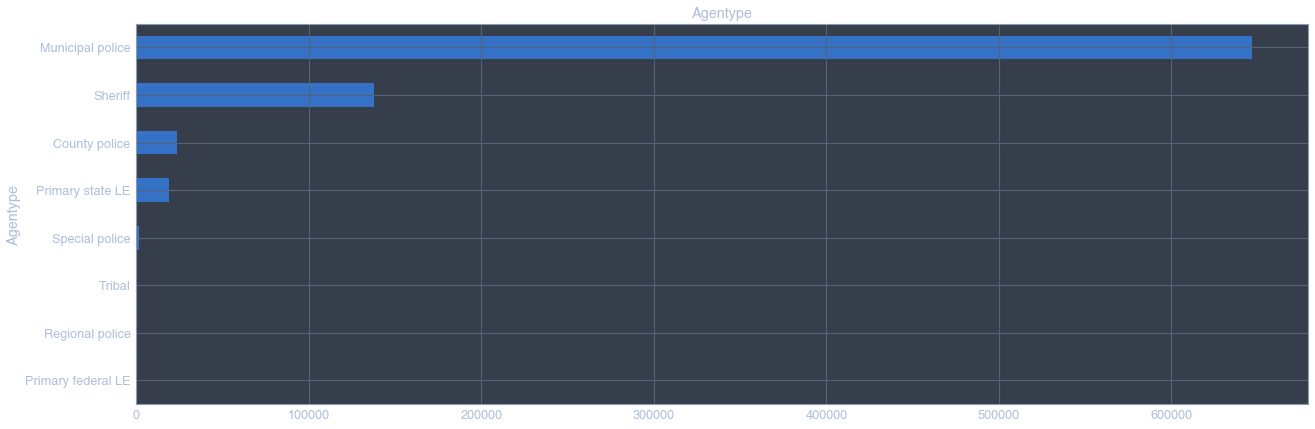

In [9]:
agentype = map_data.groupby('Agentype').count().sort_values(by=['CNTYFIPS'], ascending=False)['CNTYFIPS']

fig, ax = plt.subplots(figsize=(21, 7))
agentype.plot(kind='barh', ax=ax).invert_yaxis()
ax.set_title('Agentype')

In [10]:
map_data.groupby('Source').count()

,ID,CNTYFIPS,State,Agency,Agentype,Solved,Year,Month,Incident,ActionType,...,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,MSA
Source,,,,,,,,,,,,,,,,,,,,,
FBI,790928,790928,790928,790928,790928,790928,790928,790928,790928,790928,...,790928,790928,790928,790928,790928,790928,31439,790928,790928,790928
MAP,39457,39457,39457,39457,39457,39457,39457,39457,39457,39457,...,39457,39457,39457,39457,39457,39457,1861,39457,39457,39457


Text(0.5, 1.0, 'Cases by Year')

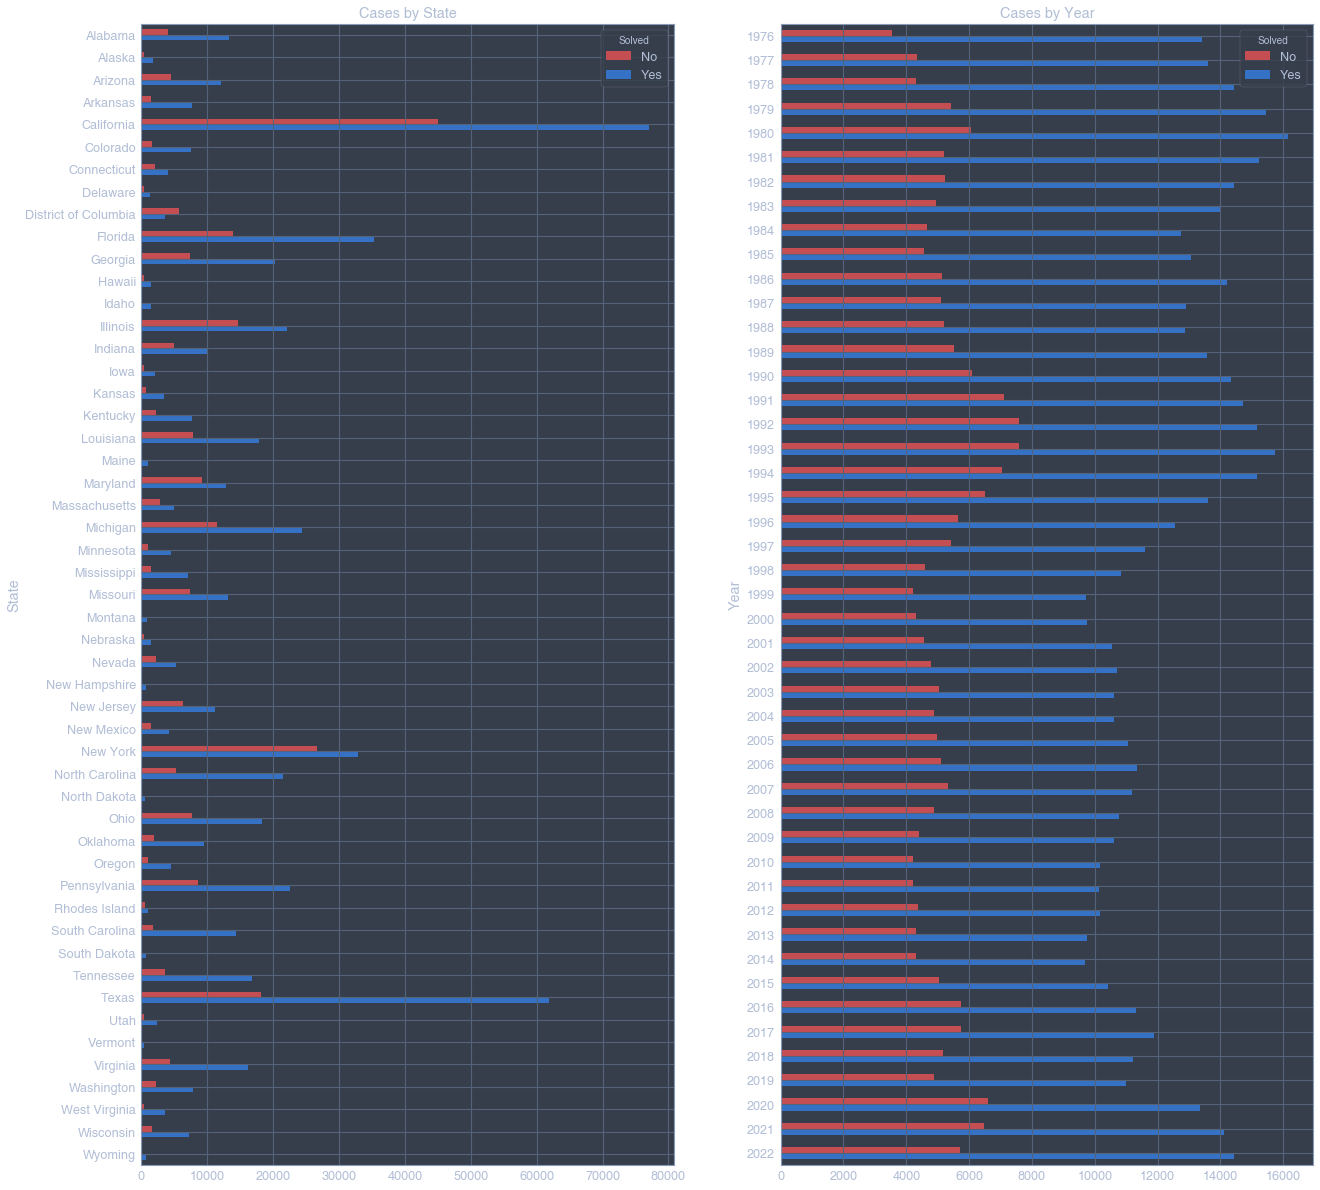

In [33]:
by_state = map_data.groupby(['Solved', 'State']).count()['ID'].to_frame()
by_state = pd.pivot_table(by_state, values='ID', index='State', columns='Solved')

by_year = map_data.groupby(['Solved', 'Year']).count()['ID'].to_frame()
by_year = pd.pivot_table(by_year, values='ID', index='Year', columns='Solved')

fig, ax = plt.subplots(1, 2, figsize=(21, 21))

by_state.plot(kind='barh', ax=ax[0], color=colors['Solved']).invert_yaxis()
ax[0].set_title('Cases by State')

by_year.plot(kind='barh', ax=ax[1], color=colors['Solved']).invert_yaxis()
ax[1].set_title('Cases by Year')